# Lab 2 Daniel Claesson

Links to material I found useful in this lab:
- [Geeks for Geeks, working with csv files](https://www.geeksforgeeks.org/working-csv-files-python/)
- [Pyhton doc, reading and writing files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)
- [Programiz, python list count](https://www.programiz.com/python-programming/methods/list/count)
- [Stackoverflow, sort list based on another list](https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list)
- [nkmk.me, How to return multiple values from function](https://note.nkmk.me/en/python-function-return-multiple-values/)


**read_traingdata** funktionen:
- Läser in trainingdatan direkt från .txt-filen, baserat på filepath input
- Gör om strings till floats, tar bort white_spaces etc.
- Returnerar en list of lists: [[width],[height],[label]]

In [2]:
import matplotlib.pyplot as plt
import math

def read_trainingdata(filepath):
    """Returns list of list with width, heigh and label values."""
    with open(filepath, "r") as file:
        content = file.readlines()

    width = []
    height = []
    label = []
    content2 = []

    for item in content:
        content2.append(item.split(','))

    del content2[0]

    for item in content2:
        item[0] = float(item[0])
        item[1] = item[1].strip()
        item[1] = float(item[1])
        item[2] = item[2].strip()
        item[2] = item[2].replace('\n','')
        item[2] = int(item[2])
        width.append(item[0])
        height.append(item[1])
        label.append(item[2])

    returnlist = []
    returnlist.append(width)
    returnlist.append(height)
    returnlist.append(label)

    return returnlist

TD = read_trainingdata("..\Data\datapoints.txt")


**plot_trainingdata** funktionen:
- plottar träningsdatan för varje sample

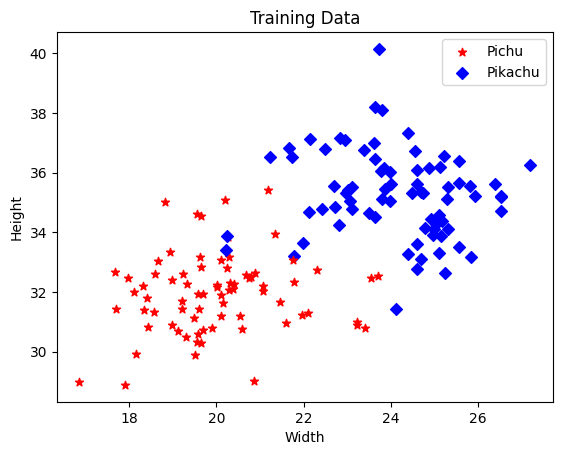

In [9]:
def plot_trainingdata(width, height, label=None):
    """Plots all training data"""
    for idx in range(len(label)):
        if label[idx] == 1:
            plt.scatter(width[idx], height[idx], color = 'blue', marker = "D")
        elif label[idx] == 0:
            plt.scatter(width[idx], height[idx], color = 'red', marker = "*")
        else: break
    
    plt.title('Training Data')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.legend(['Pichu','Pikachu'])


plot_trainingdata(TD[0], TD[1], TD[2])

**read_sampledata* funktionen:
- läser in sample datan från filen

In [10]:
def read_sampledata(filepath):
    """Functions reads the file testpoints.txt,
    extracts the weight and height and stores
    as a list of lists, that can be parsed as arguments
    to the classifier function."""
    with open(filepath, 'r') as file:
        content = file.readlines()
    
    coordinates = []

    for idx in content:
        if '(' and ')' not in idx:
            continue
        else:
            idx_l = idx.find('(')
            idx_m = idx.find(',')
            idx_r = idx.find(')')
            x = float(idx[idx_l+1:idx_m])
            y = float(idx[idx_m+1:idx_r])

            coordinates_list = [x, y]

        coordinates.append(coordinates_list)

    return coordinates

sample_data_coord = read_sampledata('..\Data\\testpoints.txt')
print(sample_data_coord)


[[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


**Classifier** funktionen:
- tar en sample punkts coordinater som inputargument
- beräknar distansen mellan sample punkt och träningsdatans alla punkter
- identifirerar närmsta träningsdata punkt
- klassificerar Pichu / Pikatchu, beroende på närmsta punkts "label"
- Returnerar en sträng med resultatet

In [15]:
def classifier(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = []
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    #finding index of the minimum distance, in "dist" list
    idx_min_dist = dist.index(min(dist))

    if TD_label[idx_min_dist] == 0:
        pokemon = "Pichu"
    elif TD_label[idx_min_dist] == 1:
        pokemon = "Pikachu"
   
    return pokemon
        
pokemon = classifier([24.2, 31.5])

print(pokemon)

Pikachu


**classifier10** funktionen baserar analysen på de 10 närmaste grannarna.

In [14]:
def classifier10(coordinates):
    """Use nearest neighbour classification to identify
    between Pikachu and Pichu, based on sample data coordinates.
    Coordinates to be given on format [x1, y1], a list.
    Function uses 10 nearest neighbours for determination."""
    TD_width = TD[0] # x
    TD_height = TD[1] # y
    TD_label = TD[2] # label
    dist = [] #
    for idx in range(len(TD_label)):
        d = math.sqrt((TD_width[idx] - coordinates[0])**2 + (TD_height[idx] - coordinates[1])**2)
        dist.append(d)
    
    # skapar sorterad lista för labels, baserad på dist-listan.
    TD_label_sorted_10 = [x[1] for x in sorted(zip(dist, TD_label))] # https://stackoverflow.com/questions/6618515/sorting-list-according-to-corresponding-values-from-a-parallel-list

    print(f"{TD_label_sorted_10[0:10] = }")
   
    if TD_label_sorted_10[0:10].count(0) > 5:
        pokemon = "Pichu"
    elif TD_label_sorted_10[0:10].count(1) > 5:
        pokemon = "Pikachu"
    else: pokemon = "it's a draw!"
    
    return pokemon
        
pokemon = classifier10([24.2, 31.5])

print(f"The identified Pokemon is {pokemon}.")

TD_label_sorted_10[0:10] = [1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
The identified Pokemon is it's a draw!.


**evaluation** funktionen:
- tar lista med flertalet coordinater som inputargument
- för varje koordinat anropas classifier funktionen
- classifier funktionen output används för att skriva ut resultatet

In [12]:
def multi_evaluation(data):
    """Evaluates multiple coordinates, arguments as a list.
    Returns classification for each of the coordinates."""
    res_str=""
    for element in data:
        pokemon = classifier(element)
        res_str = res_str + (f"Sample with (width, heigt): {element[0]}, {element[1]} classified as {pokemon}.\n")
    
    print(res_str)


data = multi_evaluation(sample_data_coord)

Sample with (width, heigt): 25.0, 32.0 classified as Pikachu.
Sample with (width, heigt): 24.2, 31.5 classified as Pikachu.
Sample with (width, heigt): 22.0, 34.0 classified as Pikachu.
Sample with (width, heigt): 20.5, 34.0 classified as Pichu.



Manual user input.
- Here the user is asked to input weight and height of the Pokemon.
- The classifier function is called, with user defines weight and height.
- Error messages are given if the input is not reasonable.

In [13]:
user_width = []
user_heigh = []
allowed_input = {".","0","1","2","3","4","5","6","7","8","9"}

while True:
    width = input("Input Pokemon width(cm): ")
    if not width:
        print("No input was given on width, continue to height.")
        break
    elif not len(width) == len([x for x in width if x in allowed_input]):
        print("Input must be a positive number, it can not be nagative or contain letters, try again.")
        continue
    else:
        user_width = float(width)
        print(f"Given input on width is {width} cm.")
        break

while True:
    height = input("Input Pokemon height(cm): ")
    if not height:
        print("No input on weight and height was given, closing program.")
        break
    elif not len(height) == len([x for x in height if x in allowed_input]):
        print("Input must be a positive number, it can not be nagative or contain letters, try again.")
        continue
    else:
        user_height = float(height)
        print(f"Given input on height is {height} cm.")
        break

user_call = []
user_call.append(user_width)
user_call.append(user_height)

user_result = classifier(user_call)
print(f"The Pokemon classification is {user_result}, with width = {user_width} cm and height = {user_height} cm")


Given input on width is 34.2 cm.
Input must be a positive number, it can not be nagative or contain letters, try again.
Input must be a positive number, it can not be nagative or contain letters, try again.
Input must be a positive number, it can not be nagative or contain letters, try again.
Input must be a positive number, it can not be nagative or contain letters, try again.
Given input on height is 23 cm.
The Pokemon classification is Pikachu, with width = 34.2 cm and height = 23.0 cm


# Valfria uppifter
- Skapar en funktion som använder redan inläst testdata (TD), för att dela upp så att det finns 50 träningsdata för Pikachu och 50 träningsdata för Pichu, slumpmässigt. Samt då 25 Pikachu sample data och 25 Pichu sample data.
- Skapar en ny classifier funktion som tar både testdata och sampledata som argument. Funktionen classificerar varje sample data samt jämför med "facit" (dess label).

In [19]:
import random

def data_prepare(TD):
    """Function returns one list of lists with data for 50 Pichu and
    50 Pikachu, and another list of lists with 25 Pichu and 25 Pikachu,
    all randomly selected from Test Data (TD), i.e. it uses already read
    in data. Format [[width],[hight],[label]]"""
    width = TD[0]
    height = TD[1]
    label = TD[2]

    #create lists containing Pichu or Pikachu only
    width_pichu = [x for x, y in zip(width, label) if y == 0]
    height_pichu = [x for x, y in zip(height, label) if y == 0]
    width_pikachu = [x for x, y in zip(width, label) if y == 1]
    height_pikachu = [x for x, y in zip(height, label) if y == 1]
    
    # randomise the lists. Creating a template to sort by (random unique integers, ranging from 0 to max len of list)
    random_template = random.sample(range(0, len(width_pichu)), len(width_pichu))

    # create new lists where the random "template" is applied to the data, creating randomized data:
    width_pichu_random = [y for x, y in sorted(zip(random_template, width_pichu))]
    height_pichu_random = [y for x, y in sorted(zip(random_template, height_pichu))]
    label_pichu_random = [0] * len(height_pichu_random)
    
    width_pikachu_random = [y for x, y in sorted(zip(random_template, width_pikachu))]
    height_pikachu_random = [y for x, y in sorted(zip(random_template, height_pikachu))]
    label_pikachu_random = [1] * len(height_pikachu_random)

    # create one list of "test data", 100 data points in total (50 Pichu/50 Pikachu)
    TD100 = [width_pichu_random[0:50]+width_pikachu_random[0:50],height_pichu_random[0:50]+height_pikachu_random[0:50],label_pichu_random[0:50]+label_pikachu_random[0:50]]
    # create one list of "sample data", 50 data points in total (25 Pichu / 25 Pikachu)
    SD50 =  [width_pichu_random[50:-1]+width_pikachu_random[50:-1],height_pichu_random[50:-1]+height_pikachu_random[50:-1],label_pichu_random[50:-1]+label_pikachu_random[50:-1]]
    
    return TD100, SD50

TD100, SD50 = data_prepare(TD)

#print(TD100)
#print(SD50)


[[18.659636883604406, 19.639358214988224, 18.990689973799388, 18.424438779822488, 20.191281253428173, 19.69944356712352, 19.689909518113225, 19.574019952530243, 20.23890182459327, 19.55060327163345, 20.795121649361587, 20.282109030336354, 20.286130095999752, 21.78836263199249, 20.411629224757448, 21.959384499160468, 23.213535136458052, 20.098954730848863, 20.670175582205307, 21.457545842765146, 21.35018601896744, 17.96926166354966, 23.541999631800756, 19.120619567709372, 23.22258522384455, 21.07884990354048, 20.39204407747099, 21.069573240979203, 19.332572350434354, 22.30210323807139, 17.905128921789093, 19.64060341428934, 19.299333494980544, 19.56686423226426, 20.276898330625336, 19.209914415003638, 22.091553997471266, 19.213188999276543, 19.63004376836659, 20.579090632339703, 19.64717255190365, 16.866105280907732, 21.58631807419169, 20.323269906838078, 21.19030359241021, 17.672876665469843, 19.245073847748515, 18.836400960218388, 18.310337204918557, 20.118681851201636, 24.38528964752

In [14]:
del SD50
del TD100
del TD50


In [20]:
# försökte med cvs modulen, men det är ju en textfil.... Överger denna approachen tills vidare.
import csv
fields = []
rows = []
column = []

with open("..\Data\datapoints.csv") as csvfile:
    content = csv.reader(csvfile)
    fields = next(content)
    for row in content:
        rows.append(row)
    #print("total nbr of rows: "%(content.line_num))
    for column in content:
        column.append(column)

In [8]:
import random

randomlist = random.sample(range(0, 75), 75) 

print(randomlist)
print(len(randomlist))
print(min(randomlist))

[11, 15, 41, 18, 28, 33, 10, 62, 39, 64, 50, 43, 9, 38, 61, 20, 54, 56, 71, 7, 72, 49, 13, 25, 16, 14, 40, 32, 29, 34, 46, 73, 67, 36, 53, 63, 68, 31, 45, 0, 66, 74, 2, 48, 42, 44, 22, 12, 52, 5, 57, 26, 23, 59, 30, 65, 70, 6, 27, 21, 8, 19, 51, 35, 58, 3, 37, 24, 1, 69, 17, 4, 55, 47, 60]
75
0
